In [175]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import train_test_split
from scipy import stats

# Obtenção dos Dados

In [2]:
df_iris = pd.read_csv("../dados/iris.csv")

In [3]:
df_outliers = pd.read_csv("../dados/outliers-dataset.csv")

In [4]:
df_exemplo1 = pd.read_csv("../dados/exemplo1-regressaoLinear.csv")

## Tratamento dos Dados

In [28]:
def get_data(df, column_x, column_y):
    X = df[column_x].tolist()
    Y = df[column_y].tolist()
    return X, Y

# Exercícios

## 1. Modelos de Regressão Linear

Faça um programa que gere o modelo de regressão linear para os dois datasets usados nesta aula. 

Os modelos devem ser gerados de duas formas:

* Usando as equações apresentadas no slide 15.
* Usando o modelo de regressão linear disponível no Scikit.

### Por Equações

In [9]:
def manual_linear_regression(X, Y):
    X = np.array(X)
    Y = np.array(Y)
    
    XY = X * Y
    X_mean = np.mean(X)
    Y_mean = np.mean(Y)
    XY_mean = np.mean(XY)
    X_squared = X**2
    Y_squared = Y**2
    X_squared_mean = np.mean(X_squared)
    Y_squared_mean = np.mean(Y_squared)
    X_mean_squared = X_mean**2
    Y_mean_squared = Y_mean**2
    
    theta_0 = (Y_mean * X_squared_mean - X_mean * XY_mean)/(X_squared_mean - X_mean_squared)
    theta_1 = (XY_mean - X_mean * Y_mean)/(X_squared_mean - X_mean_squared)

    return (theta_0, theta_1)

##### Dados Exemplo 1

Y = -0.08892359520679478.x + 1.9753966018291795


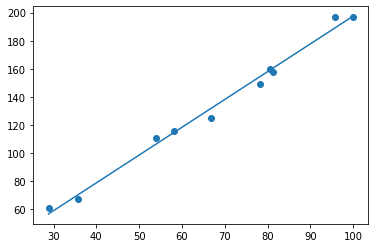

In [10]:
X, Y = get_data(df_exemplo1, 'X', 'Y')

t0, t1 = manual_linear_regression(X, Y)
print(f"Y = {t0}.x + {t1}")

plt.scatter(x=X, y=Y)

x_linha = np.array([min(X), max(X)])
y_linha = x_linha * t1 + t0
plt.plot(x_linha, y_linha)

#### Dados Iris

Y = -0.3665140452167261.x + 0.41641913228540106


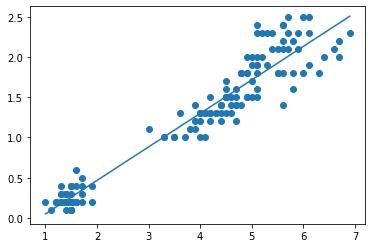

In [31]:
X, Y = get_data(df_iris, 'petalLengthInCM', 'petalWidthInCM')

t0, t1 = manual_linear_regression(X, Y)
print(f"Y = {t0}.x + {t1}")

plt.scatter(x=X, y=Y)

x_linha = np.array([min(X), max(X)])
y_linha = x_linha * t1 + t0
plt.plot(x_linha, y_linha)

### Por Scikit

In [32]:
def scikit_linear_regression(X, Y):
    X = np.array(X).reshape(-1, 1)
    Y = np.array(Y).reshape(-1, 1)

    model = LinearRegression().fit(X,Y)
    return (model.intercept_[0], model.coef_[0][0])

##### Dados Exemplo 1

Y = -0.08892359520694981.x + 1.9753966018291784


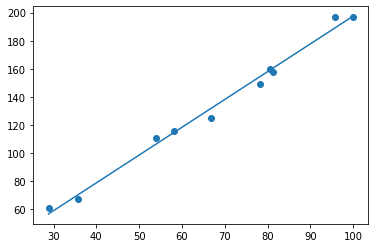

In [137]:
X, Y = get_data(df_exemplo1, 'X', 'Y')

t0, t1 = scikit_linear_regression(X, Y)
print(f"Y = {t0}.x + {t1}")

plt.scatter(x=X, y=Y)

x_linha = np.array([min(X), max(X)])
y_linha = x_linha * t1 + t0
plt.plot(x_linha, y_linha)

#### Dados Iris

Y = -0.3665140452167275.x + 0.4164191322854012


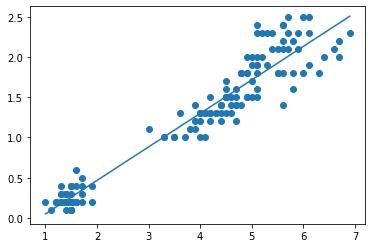

In [33]:
X, Y = get_data(df_iris, 'petalLengthInCM', 'petalWidthInCM')

t0, t1 = scikit_linear_regression(X, Y)
print(f"Y = {t0}.x + {t1}")

plt.scatter(x=X, y=Y)

x_linha = np.array([min(X), max(X)])
y_linha = x_linha * t1 + t0
plt.plot(x_linha, y_linha)

## 2. F-Test

Como o dataset da Iris possui diversas classes de plantas, não faz sentido criarmos regressões generalizadas, sendo interessante fazermos uma para cada grupo.

In [139]:
def sse(y, ypred):
    return np.sum( (np.array(ypred) - np.array(y))**2 )

def ssr(y, ypred):
    ymean = np.mean(y)
    return np.sum( (np.array(ypred) - ymean)**2 )

def sst(y):
    ymean = np.mean(y)
    return np.sum( (np.array(y) - ymean)**2 )

def f(y, ypred, dfssr, dfsse):
    """ 
        dfssr = quantidade de coeficientes usados
        dfsse = total de instancias menos a quantidade de coeficientes usados
    """
    msr = ssr(y, ypred)/dfssr
    mse = sse(y, ypred)/dfsse
    f = msr/mse
    return f

def critical_value(alpha, dfssr, dfsse):
    return stats.f.ppf(alpha, dfssr, dfsse)

def r2(y, ypred):
    f = 1 - sse(y, ypred)/sst(y)
    return f


In [129]:
def train_iris(df, column_x, column_y, alpha=0.5):
    X, Y = get_data(df, column_x, column_y)
    classe = df["class"].iloc[0]
    print(df["class"].iloc[0])

    t0, t1 = scikit_linear_regression(X, Y)
    print(f"Y = {t0}.x + {t1}")

    plt.scatter(x=pd.Series(X, name=classe), y=Y)

    x_linha = np.array(X)
    y_linha = x_linha * t1 + t0
    plt.plot(x_linha, y_linha)

    plt.title(label=f"{column_x} x {column_y}")
    
    r2_value = r2(Y, y_linha)
    f_value = f(Y, y_linha, 2, len(y_linha)-2)
    c_value = critical_value(alpha, 2, len(y_linha)-2)

    print("R2: ", r2_value)
    print("F: ", f_value)
    print("C: ", c_value)
    print("Hipótese Nula Rejeitada: ", f_value > c_value)
    print()

    return classe

Iris-setosa
Y = -0.03308026030368777.x + 0.18926247288503265
R2:  0.09382472022283606
F:  2.484942301562005
C:  0.7032536794438088
Hipótese Nula Rejeitada:  True

Iris-versicolor
Y = -0.08428835489833664.x + 0.3310536044362292
R2:  0.6188466815001425
F:  38.96678747140168
C:  0.7032536794438088
Hipótese Nula Rejeitada:  True

Iris-virginica
Y = 1.1360313036020584.x + 0.1602969554030875
R2:  0.10375370275048612
F:  2.7783533094122546
C:  0.7032536794438088
Hipótese Nula Rejeitada:  True



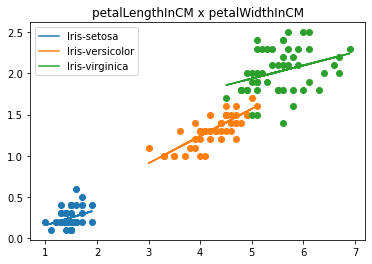

In [130]:
classes = df_iris.groupby("class").apply(lambda df: train_iris(df, 'petalLengthInCM', 'petalWidthInCM', 0.5))
plt.legend(classes)

Iris-setosa
Y = -0.623011727604216.x + 0.807233665122696
R2:  0.5576809258922097
F:  30.259473318917642
C:  0.7032536794438088
Hipótese Nula Rejeitada:  True

Iris-versicolor
Y = 0.8721459648262753.x + 0.3197193455481343
R2:  0.27658208255293537
F:  9.175844033136181
C:  0.7032536794438088
Hipótese Nula Rejeitada:  True

Iris-virginica
Y = 1.446305418719212.x + 0.23189049503351375
R2:  0.20905727608452873
F:  6.343537242735803
C:  0.7032536794438088
Hipótese Nula Rejeitada:  True



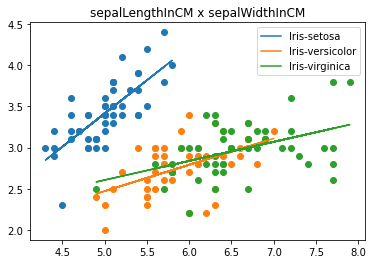

In [132]:
classes = df_iris.groupby("class").apply(lambda df: train_iris(df, 'sepalLengthInCM', 'sepalWidthInCM', 0.5))
plt.legend(classes)

Iris-setosa
Y = 0.8137676160441512.x + 0.12989060806149597
R2:  0.06962953691366014
F:  1.796175773233626
C:  0.7032536794438088
Hipótese Nula Rejeitada:  True

Iris-versicolor
Y = 0.18511550952876732.x + 0.6864697591764205
R2:  0.568589831953704
F:  31.631512137712285
C:  0.7032536794438088
Hipótese Nula Rejeitada:  True

Iris-virginica
Y = 0.6104679802955673.x + 0.75008075587499
R2:  0.746884389017568
F:  70.81833185573755
C:  0.7032536794438088
Hipótese Nula Rejeitada:  True



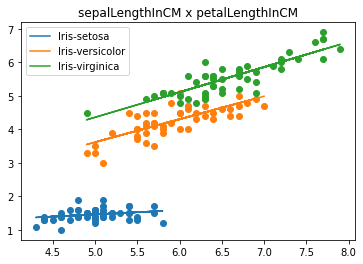

In [133]:
classes = df_iris.groupby("class").apply(lambda df: train_iris(df, 'sepalLengthInCM', 'petalLengthInCM', 0.5))
plt.legend(classes)

Iris-setosa
Y = -0.18093689432016008.x + 0.08488551624453856
R2:  0.07789210723575557
F:  2.0273230370625233
C:  0.7032536794438088
Hipótese Nula Rejeitada:  True

Iris-versicolor
Y = 0.0832557141981729.x + 0.2093571910043509
R2:  0.29861970277272265
F:  10.218240938443394
C:  0.7032536794438088
Hipótese Nula Rejeitada:  True

Iris-virginica
Y = 1.2261083743842365.x + 0.12141645804732298
R2:  0.07902154414767626
F:  2.0592415028743374
C:  0.7032536794438088
Hipótese Nula Rejeitada:  True



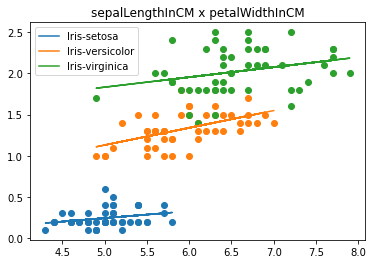

In [134]:
classes = df_iris.groupby("class").apply(lambda df: train_iris(df, 'sepalLengthInCM', 'petalWidthInCM', 0.5))
plt.legend(classes)

Iris-setosa
Y = 1.1889763558154574.x + 0.08046332480530792
R2:  0.031220991810302356
F:  0.7734517336904725
C:  0.7032536794438088
Hipótese Nula Rejeitada:  True

Iris-versicolor
Y = 1.9349222797927461.x + 0.8393782383419687
R2:  0.3141850152758757
F:  10.994860909395594
C:  0.7032536794438088
Hipótese Nula Rejeitada:  True

Iris-virginica
Y = 3.5108983163926064.x + 0.6863152937482832
R2:  0.16083675301605338
F:  4.599917937610933
C:  0.7032536794438088
Hipótese Nula Rejeitada:  True



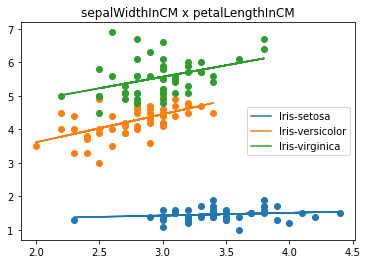

In [135]:
classes = df_iris.groupby("class").apply(lambda df: train_iris(df, 'sepalWidthInCM', 'petalLengthInCM', 0.5))
plt.legend(classes)

Iris-setosa
Y = -0.025257949337906593.x + 0.07877646265006044
R2:  0.07838481830449939
F:  2.0412376843088205
C:  0.7032536794438088
Hipótese Nula Rejeitada:  True

Iris-versicolor
Y = 0.16690569948186584.x + 0.4184455958549219
R2:  0.4408943001936584
F:  18.925693671720577
C:  0.7032536794438088
Hipótese Nula Rejeitada:  True

Iris-virginica
Y = 0.6640594953102315.x + 0.45794906008398406
R2:  0.2891514302321312
F:  9.762465060367653
C:  0.7032536794438088
Hipótese Nula Rejeitada:  True



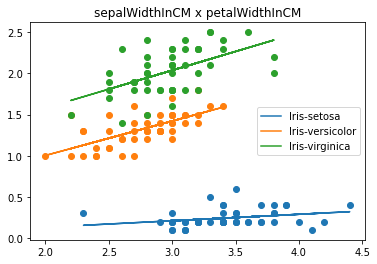

In [136]:
classes = df_iris.groupby("class").apply(lambda df: train_iris(df, 'sepalWidthInCM', 'petalWidthInCM', 0.5))
plt.legend(classes)

# Regressão Ridge

O fator ridge é utilizado para a regularização da regressão linear, adicionando um fator de peso aos valores do coeficiente da regressão linear.

$\sum_{i=1}^n (y - y')^2 + \lambda * \theta_1^2$

Aumentando o fator lambda damos mais prioridade para reduzir o coeficiente, aproximando a reta da média.

In [185]:
def scikit_ridge_regression(X, Y, ridge_factor):
    X = np.array(X).reshape(-1, 1)
    Y = np.array(Y).reshape(-1, 1)

    model = Ridge(alpha=ridge_factor).fit(X,Y)
    return (model.intercept_[0], model.coef_[0][0])

In [194]:
def train_iris_sample(df, column_x, column_y, ridge_factor=0, sample=10):
    
    # Todos os Pontos
    X_geral, Y_geral = get_data(df, column_x, column_y)
    plt.scatter(x=X_geral, y=Y_geral, c="gray")

    # Pontos do Sample
    df_sample, _ = train_test_split(df, train_size=sample)
    X, Y = get_data(df_sample, column_x, column_y)
    plt.scatter(x=X, y=Y, c="red")

    # Regressão Linear
    t0, t1 = scikit_linear_regression(X, Y)
    x_linha = np.array(X_geral)
    y_linha = x_linha * t1 + t0
    print(f"Y = {t0}.x + {t1}")
    line_linear, = plt.plot(x_linha, y_linha, label="Regressão Linear")

    # Regressão Ridge
    t0, t1 = scikit_ridge_regression(X, Y, ridge_factor)
    x_linha = np.array(X_geral)
    y_linha = x_linha * t1 + t0
    print(f"Y = {t0}.x + {t1}")
    line_ridge, = plt.plot(x_linha, y_linha, label="Regressão Ridge")

    plt.title(label=f"[alpha={ridge_factor}] {column_x} x {column_y}")

    plt.legend(handles=[line_linear, line_ridge])

Y = -5.026948051948052.x + 1.0827922077922076
Y = -5.026948051948052.x + 1.0827922077922076


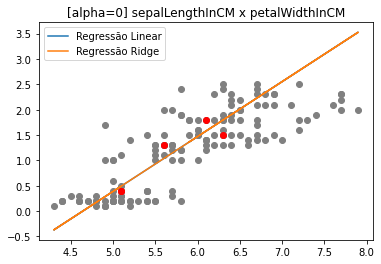

In [195]:
# Ridge Factor = 0 será identico à regressão linear pois não há regularização
train_iris_sample(df_iris, 'sepalLengthInCM', 'petalWidthInCM', ridge_factor=0, sample=5)

Y = -2.9826315789473665.x + 0.7631578947368417
Y = -0.8785981308411213.x + 0.4065420560747663


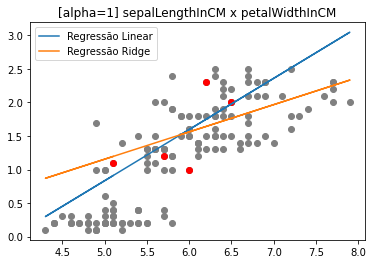

In [196]:
train_iris_sample(df_iris, 'sepalLengthInCM', 'petalWidthInCM', ridge_factor=1, sample=5)

Y = -1.755849889624724.x + 0.41942604856512145
Y = -0.17345860246623612.x + 0.11156782149148563


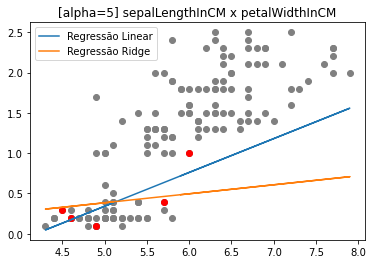

In [197]:
train_iris_sample(df_iris, 'sepalLengthInCM', 'petalWidthInCM', ridge_factor=5, sample=5)

Y = -1.9934156378600822.x + 0.4732510288065844
Y = -0.126036866359447.x + 0.13248847926267282


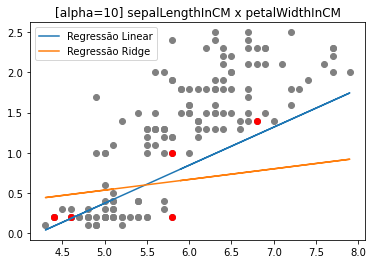

In [198]:
train_iris_sample(df_iris, 'sepalLengthInCM', 'petalWidthInCM', ridge_factor=10, sample=5)

Y = -3.103629032258066.x + 0.6975806451612906
Y = 0.5992136116671434.x + 0.07420646268229913


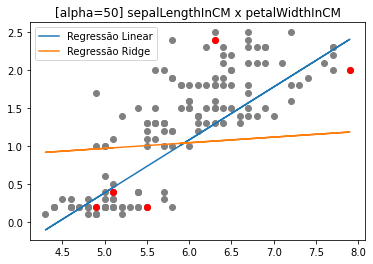

In [199]:
train_iris_sample(df_iris, 'sepalLengthInCM', 'petalWidthInCM', ridge_factor=50, sample=5)

Y = -3.373793103448276.x + 0.8206896551724139
Y = 1.0127891156462587.x + 0.023129251700680267


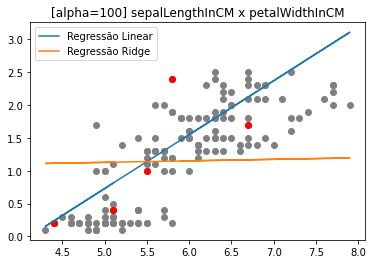

In [200]:
train_iris_sample(df_iris, 'sepalLengthInCM', 'petalWidthInCM', ridge_factor=100, sample=5)

Y = -3.1704526404023463.x + 0.6818943839061189
Y = 0.8780680459284829.x + 0.00032524479318469233


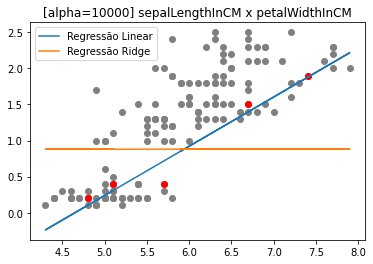

In [201]:
train_iris_sample(df_iris, 'sepalLengthInCM', 'petalWidthInCM', ridge_factor=10000, sample=5)